In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
data=pd.read_csv("loan defaulter dataset.csv")

## ETL 

- Extract
- Transform
- Load

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [6]:
data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [7]:
data.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

### Transform

In [8]:
data["Date.of.Birth"]=pd.to_datetime(data["Date.of.Birth"])

In [9]:
data["DisbursalDate"]=pd.to_datetime(data["DisbursalDate"])

In [10]:
data["Date.of.Birth"].dt.year

0         1984
1         1985
2         1985
3         1993
4         1977
          ... 
233149    1988
233150    1988
233151    1976
233152    1994
233153    1984
Name: Date.of.Birth, Length: 233154, dtype: int64

In [11]:
pd.to_datetime("now")

Timestamp('2021-10-06 10:10:41.724236')

Converting date into age

In [12]:
data["age"]=(pd.to_datetime("now")-data["Date.of.Birth"]).astype("<m8[Y]")

In [13]:
data["age"]

0         37.0
1         36.0
2         36.0
3         27.0
4         44.0
          ... 
233149    33.0
233150    33.0
233151    45.0
233152    27.0
233153    37.0
Name: age, Length: 233154, dtype: float64

In [14]:
data["CREDIT.HISTORY.LENGTH"][0].split(" ")[0][:-3]

'0'

In [15]:
def str_int(data):
    yy,mm=data.split(" ")
    return 12*(int(yy[:-3]))+int(mm[:-3])

In [16]:
data["CREDIT.HISTORY.LENGTH"].apply(str_int)

0          0
1         23
2          0
3         15
4          0
          ..
233149    39
233150     6
233151     0
233152     0
233153     0
Name: CREDIT.HISTORY.LENGTH, Length: 233154, dtype: int64

In [17]:
data["credit.history.length"]=data["CREDIT.HISTORY.LENGTH"].apply(str_int)


In [18]:
data["Avg.acc.age"]=data["AVERAGE.ACCT.AGE"].apply(str_int)

In [19]:
data["Employment.Type"]=(data["Employment.Type"].fillna(data["Employment.Type"].mode()[0]))

In [20]:
data.isnull().sum()

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Date.of.Birth                          0
Employment.Type                        0
DisbursalDate                          0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALA

In [21]:
data["MobileNo_Avl_Flag"]

0         1
1         1
2         1
3         1
4         1
         ..
233149    1
233150    1
233151    1
233152    1
233153    1
Name: MobileNo_Avl_Flag, Length: 233154, dtype: int64

## DATA ANALYSIS
- Do it and understand how each variable is impacting the outcome and what is the significance.

In [22]:
numdf=data.select_dtypes(exclude=object)

In [23]:
numdf

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,DisbursalDate,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,age,credit.history.length,Avg.acc.age
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,2018-03-08,...,0,0,0,0,0,0,0,37.0,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,2018-09-26,...,0,1991,0,0,1,0,1,36.0,23,23
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,2018-01-08,...,0,0,0,0,0,0,0,36.0,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,2018-10-26,...,0,31,0,0,0,1,1,27.0,15,8
4,539055,52378,60300,88.39,67,22807,45,1495,1977-09-12,2018-09-26,...,0,0,0,0,0,1,1,44.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,626432,63213,105405,60.72,34,20700,48,1050,1988-01-08,2018-10-26,...,0,4084,0,0,0,0,0,33.0,39,21
233150,606141,73651,100600,74.95,34,23775,51,990,1988-05-12,2018-10-23,...,0,1565,0,0,0,0,0,33.0,6,6
233151,613658,33484,71212,48.45,77,22186,86,2299,1976-01-06,2018-10-24,...,0,0,0,0,0,0,0,45.0,0,0
233152,548084,34259,73286,49.10,77,22186,86,2299,1994-03-26,2018-09-29,...,0,0,0,0,0,0,0,27.0,0,0


In [24]:
catdf=data.select_dtypes(include=object)

In [25]:
catdf

,Employment.Type,PERFORM_CNS.SCORE.DESCRIPTION,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH
0,Salaried,No Bureau History Available,0yrs 0mon,0yrs 0mon
1,Self employed,I-Medium Risk,1yrs 11mon,1yrs 11mon
2,Self employed,No Bureau History Available,0yrs 0mon,0yrs 0mon
3,Self employed,L-Very High Risk,0yrs 8mon,1yrs 3mon
4,Self employed,No Bureau History Available,0yrs 0mon,0yrs 0mon
...,...,...,...,...
233149,Salaried,D-Very Low Risk,1yrs 9mon,3yrs 3mon
233150,Self employed,A-Very Low Risk,0yrs 6mon,0yrs 6mon
233151,Salaried,No Bureau History Available,0yrs 0mon,0yrs 0mon
233152,Salaried,No Bureau History Available,0yrs 0mon,0yrs 0mon


In [26]:
data["PERFORM_CNS.SCORE.DESCRIPTION"]

0         No Bureau History Available
1                       I-Medium Risk
2         No Bureau History Available
3                    L-Very High Risk
4         No Bureau History Available
                     ...             
233149                D-Very Low Risk
233150                A-Very Low Risk
233151    No Bureau History Available
233152    No Bureau History Available
233153    No Bureau History Available
Name: PERFORM_CNS.SCORE.DESCRIPTION, Length: 233154, dtype: object

In [27]:
data["PERFORM_CNS.SCORE.DESCRIPTION"].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [28]:
data["PERFORM_CNS.SCORE"]

0           0
1         598
2           0
3         305
4           0
         ... 
233149    735
233150    825
233151      0
233152      0
233153      0
Name: PERFORM_CNS.SCORE, Length: 233154, dtype: int64

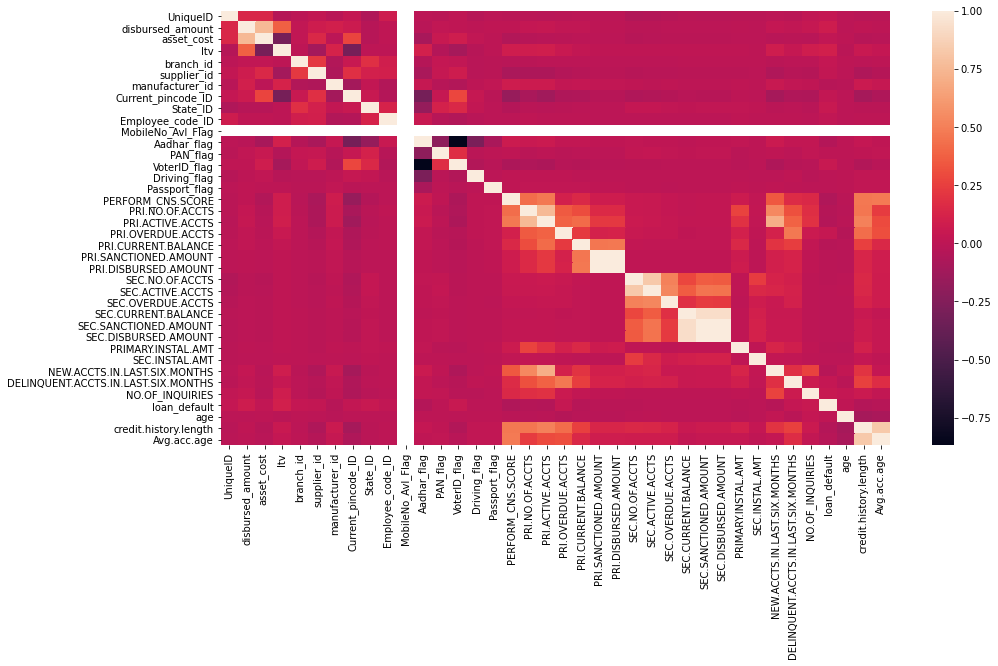

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(numdf.corr())
plt.rcParams["figure.figsize"] = [10,10]

In [30]:
numdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  int64         
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  int64         
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  int64         
 7   Current_pincode_ID                   233154 non-null  int64         
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   DisbursalDate                        233154 non-null  datetime64[ns]
 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

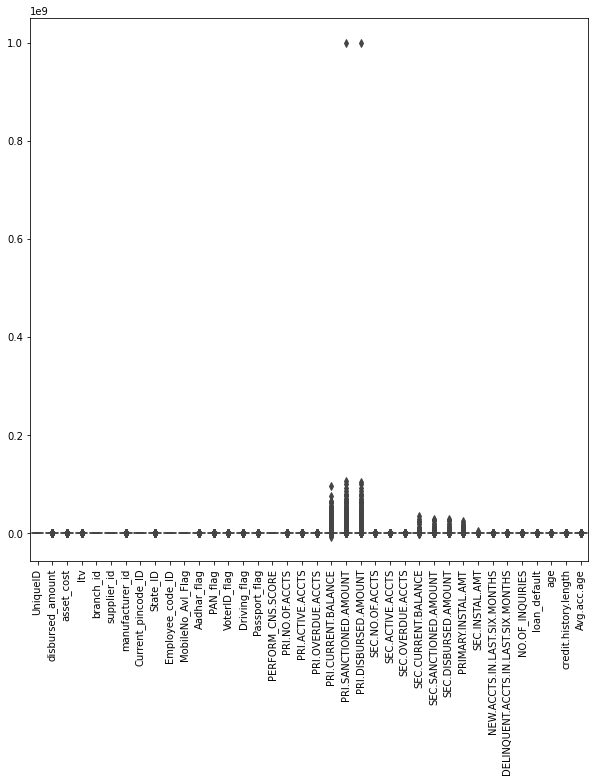

In [31]:
sns.boxplot(data=numdf.drop(["Date.of.Birth","DisbursalDate"],axis=1))
plt.xticks(rotation=90)

In [32]:
x=['PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT','SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT']

In [33]:
data['PRI.CURRENT.BALANCE']=pd.cut(data['PRI.CURRENT.BALANCE'],bins=3,labels = [ 'low', 'Medium', 'High'])

In [34]:
data["PRI.SANCTIONED.AMOUNT"]=pd.cut(data["PRI.SANCTIONED.AMOUNT"],bins=3,labels = [ 'low', 'Medium', 'High'])

In [35]:
data['PRI.DISBURSED.AMOUNT']=pd.cut(data['PRI.DISBURSED.AMOUNT'],bins=3,labels = [ 'low', 'Medium', 'High'])

In [36]:
data['SEC.CURRENT.BALANCE']=pd.cut(data['SEC.CURRENT.BALANCE'],bins=3,labels = [ 'low', 'Medium', 'High'])

In [37]:
data['SEC.SANCTIONED.AMOUNT']=pd.cut(data['SEC.SANCTIONED.AMOUNT'],bins=3,labels = [ 'low', 'Medium', 'High'])

In [38]:
data['SEC.DISBURSED.AMOUNT']=pd.cut(data['SEC.DISBURSED.AMOUNT'],bins=3,labels = [ 'low', 'Medium', 'High'])

In [39]:
data['PRIMARY.INSTAL.AMT']=pd.cut(data['PRIMARY.INSTAL.AMT'],bins=3,labels = [ 'low', 'Medium', 'High'])

In [40]:
data['SEC.INSTAL.AMT']=pd.cut(data['SEC.INSTAL.AMT'],bins=3,labels = [ 'low', 'Medium', 'High'])

In [41]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'age', 'credit.history.length', 'Avg.acc.age'],
      dtype='object')

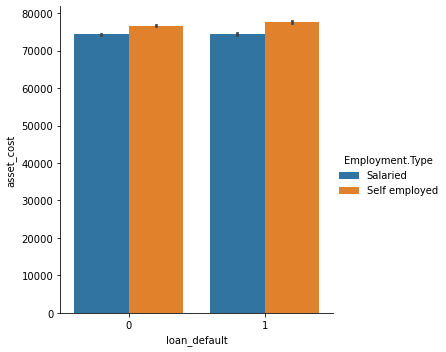

In [42]:
sns.catplot(data=data,x="loan_default",hue='Employment.Type',y='asset_cost',kind="bar")

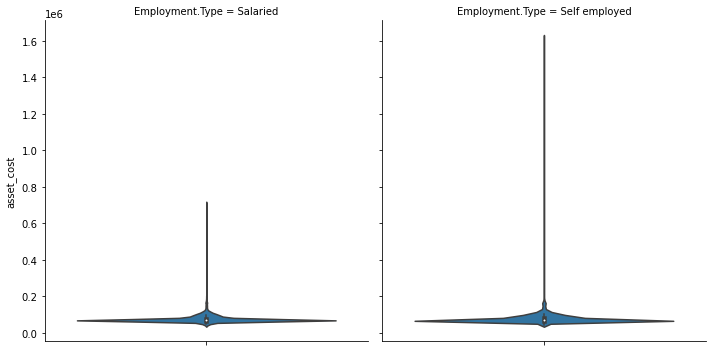

In [43]:
sns.catplot(data=data,col='Employment.Type',y='asset_cost',kind="violin")

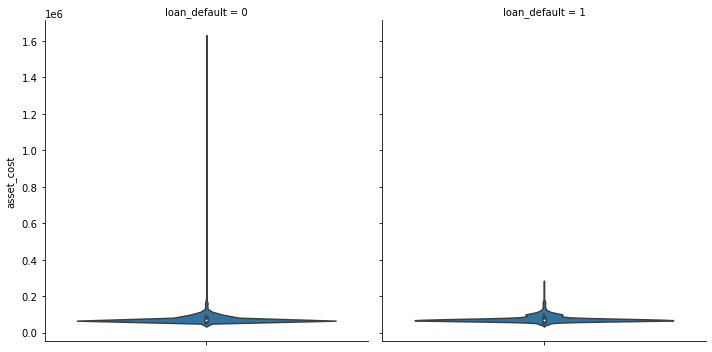

In [44]:
sns.catplot(data=data,col="loan_default",y='asset_cost',kind="violin")

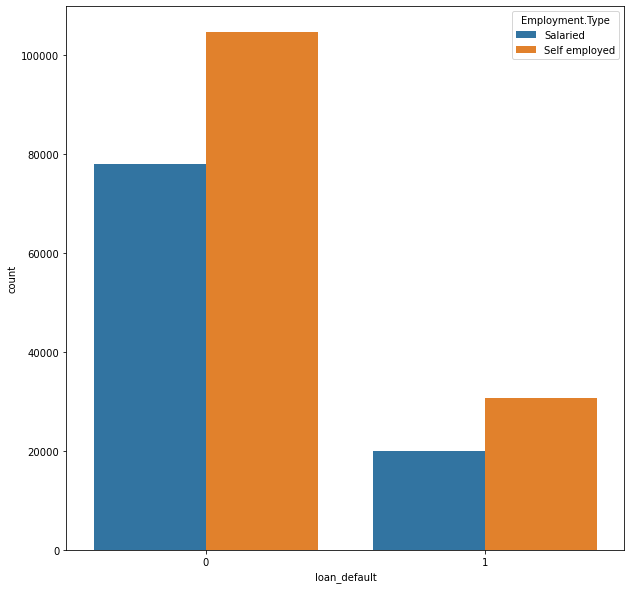

In [45]:
sns.countplot(data=data,x="loan_default",hue="Employment.Type")

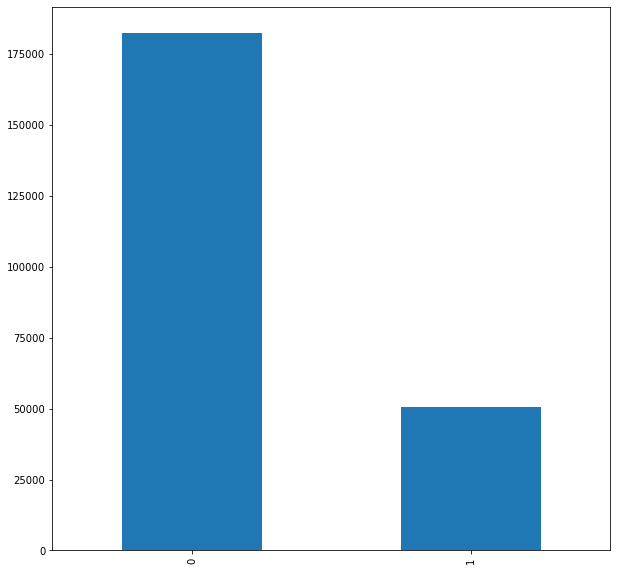

In [46]:
data["loan_default"].value_counts().plot.bar()

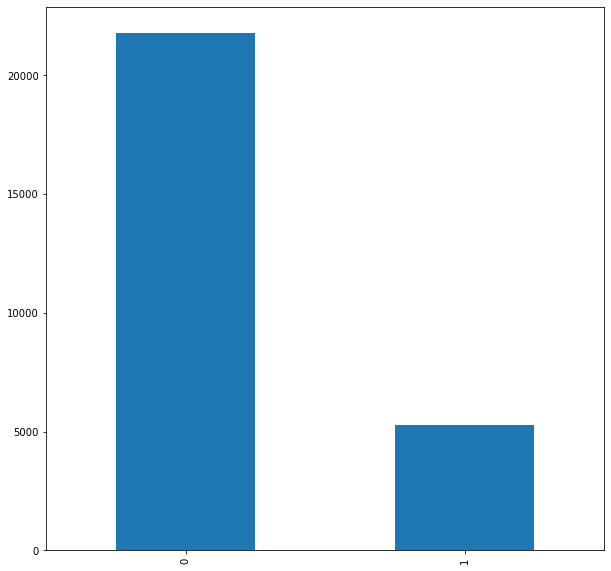

In [47]:
data[data["age"]<0]["loan_default"].value_counts().plot.bar()

### FITTING THE MODEL

In [48]:
import sklearn.preprocessing as pre
import sklearn.model_selection as ms
import sklearn.metrics as mt
import sklearn.linear_model as glm
from sklearn.tree import DecisionTreeClassifier 

In [49]:
data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'age', 'credit.history.length', 'Avg.acc.age'],
      dtype='object')

In [50]:
## Drop uniqueId,Pincode,flags...
col_ML=[ 'disbursed_amount', 'asset_cost', 'ltv',
       'Employment.Type',
       'PERFORM_CNS.SCORE','PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES',
       'loan_default', 'age', 'credit.history.length', "Avg.acc.age"]

In [51]:
data_ml=data[col_ML]

In [52]:
data_ml

,disbursed_amount,asset_cost,ltv,Employment.Type,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,age,credit.history.length,Avg.acc.age
0,50578,58400,89.55,Salaried,0,0,0,0,low,low,...,low,low,low,0,0,0,0,37.0,0,0
1,47145,65550,73.23,Self employed,598,1,1,1,low,low,...,low,low,low,0,1,0,1,36.0,23,23
2,53278,61360,89.63,Self employed,0,0,0,0,low,low,...,low,low,low,0,0,0,0,36.0,0,0
3,57513,66113,88.48,Self employed,305,3,0,0,low,low,...,low,low,low,0,0,1,1,27.0,15,8
4,52378,60300,88.39,Self employed,0,0,0,0,low,low,...,low,low,low,0,0,1,1,44.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,Salaried,735,4,3,0,low,low,...,low,low,low,0,0,0,0,33.0,39,21
233150,73651,100600,74.95,Self employed,825,1,0,0,low,low,...,low,low,low,0,0,0,0,33.0,6,6
233151,33484,71212,48.45,Salaried,0,0,0,0,low,low,...,low,low,low,0,0,0,0,45.0,0,0
233152,34259,73286,49.10,Salaried,0,0,0,0,low,low,...,low,low,low,0,0,0,0,27.0,0,0


In [53]:
data_ml["Employment.Type"]=data_ml["Employment.Type"].replace({"Salaried":0,"Self employed":1})

<ipython-input-53-85ccc1445174>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml["Employment.Type"]=data_ml["Employment.Type"].replace({"Salaried":0,"Self employed":1})


In [54]:
data["Employment.Type"]

0              Salaried
1         Self employed
2         Self employed
3         Self employed
4         Self employed
              ...      
233149         Salaried
233150    Self employed
233151         Salaried
233152         Salaried
233153         Salaried
Name: Employment.Type, Length: 233154, dtype: object

In [55]:
data_ml.dtypes

disbursed_amount                          int64
asset_cost                                int64
ltv                                     float64
Employment.Type                           int64
PERFORM_CNS.SCORE                         int64
PRI.NO.OF.ACCTS                           int64
PRI.ACTIVE.ACCTS                          int64
PRI.OVERDUE.ACCTS                         int64
PRI.CURRENT.BALANCE                    category
PRI.SANCTIONED.AMOUNT                  category
PRI.DISBURSED.AMOUNT                   category
SEC.NO.OF.ACCTS                           int64
SEC.ACTIVE.ACCTS                          int64
SEC.OVERDUE.ACCTS                         int64
SEC.CURRENT.BALANCE                    category
SEC.SANCTIONED.AMOUNT                  category
SEC.DISBURSED.AMOUNT                   category
PRIMARY.INSTAL.AMT                     category
SEC.INSTAL.AMT                         category
NEW.ACCTS.IN.LAST.SIX.MONTHS              int64
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS     

In [56]:
x=['PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT','SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT']

In [57]:
le=pre.LabelEncoder()
for i in x:
    data_ml[i]=le.fit_transform(data_ml[i])

<ipython-input-57-c89577317233>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml[i]=le.fit_transform(data_ml[i])


In [58]:
data_ml

,disbursed_amount,asset_cost,ltv,Employment.Type,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,age,credit.history.length,Avg.acc.age
0,50578,58400,89.55,0,0,0,0,0,2,1,...,2,2,2,0,0,0,0,37.0,0,0
1,47145,65550,73.23,1,598,1,1,1,2,1,...,2,2,2,0,1,0,1,36.0,23,23
2,53278,61360,89.63,1,0,0,0,0,2,1,...,2,2,2,0,0,0,0,36.0,0,0
3,57513,66113,88.48,1,305,3,0,0,2,1,...,2,2,2,0,0,1,1,27.0,15,8
4,52378,60300,88.39,1,0,0,0,0,2,1,...,2,2,2,0,0,1,1,44.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,0,735,4,3,0,2,1,...,2,2,2,0,0,0,0,33.0,39,21
233150,73651,100600,74.95,1,825,1,0,0,2,1,...,2,2,2,0,0,0,0,33.0,6,6
233151,33484,71212,48.45,0,0,0,0,0,2,1,...,2,2,2,0,0,0,0,45.0,0,0
233152,34259,73286,49.10,0,0,0,0,0,2,1,...,2,2,2,0,0,0,0,27.0,0,0


In [59]:
features=data_ml.drop("loan_default",axis=1)

In [60]:
outcome=data_ml["loan_default"]

In [61]:
features_scale=pre.minmax_scale(features)

In [62]:
x_train,x_test,y_train,y_test=ms.train_test_split(features_scale,outcome,test_size=0.3,random_state=12356)

In [63]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((163207, 25), (69947, 25), (163207,), (69947,))

In [64]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [65]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [66]:
clf.score(x_train,y_train)

0.7830485212031346

In [67]:
clf.score(x_test,y_test)

0.7826497205026663

## UNDERSAMPLING

Find Number of samples which are  non default

In [71]:
no_default = len(data_ml[data_ml['loan_default'] == 0])
no_default

182543

Get indices of default samples

In [72]:
yes_default_indices = data_ml[data_ml.loan_default == 1].index

Random sample default indices

In [73]:
random_indices = np.random.choice(yes_default_indices,no_default)

Find the indices of non default samples

In [74]:
default_indices = data_ml[data_ml.loan_default == 0].index

Concat default indices with sample non-default ones

In [75]:
under_sample_indices = np.concatenate([default_indices,random_indices])

In [76]:
under_sample = data_ml.loc[under_sample_indices]

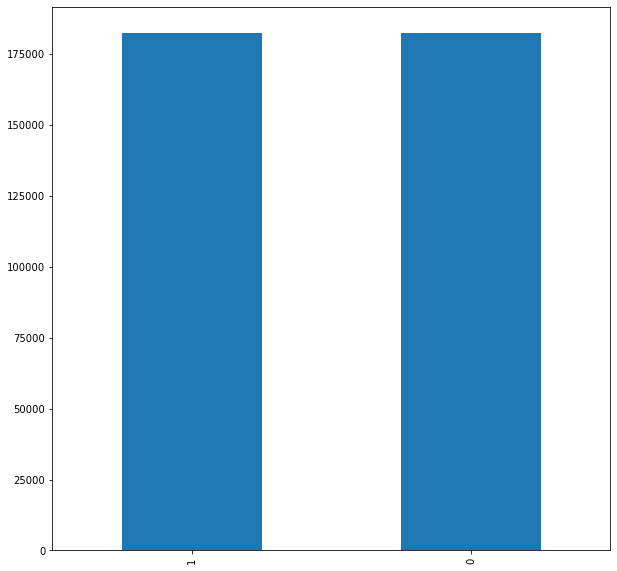

In [77]:
under_sample["loan_default"].value_counts().plot.bar()

In [78]:
x=['PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT','SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT']

In [79]:
le=pre.LabelEncoder()
for i in x:
    under_sample[i]=le.fit_transform(under_sample[i])

In [80]:
under_sample

,disbursed_amount,asset_cost,ltv,Employment.Type,PERFORM_CNS.SCORE,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default,age,credit.history.length,Avg.acc.age
0,50578,58400,89.55,0,0,0,0,0,2,1,...,2,2,2,0,0,0,0,37.0,0,0
2,53278,61360,89.63,1,0,0,0,0,2,1,...,2,2,2,0,0,0,0,36.0,0,0
5,54513,61900,89.66,1,825,2,0,0,2,1,...,2,2,2,0,0,0,0,31.0,24,21
6,46349,61500,76.42,0,0,0,0,0,2,1,...,2,2,2,0,0,0,0,33.0,0,0
7,43894,61900,71.89,0,17,1,1,0,2,1,...,2,2,2,0,0,0,0,32.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79769,82586,160000,53.06,0,0,0,0,0,2,1,...,2,2,2,0,0,0,1,26.0,0,0
183530,49847,84625,60.38,0,710,4,1,0,2,1,...,2,2,2,1,0,0,1,29.0,21,12
59086,54313,66538,84.01,1,737,1,1,0,2,1,...,2,2,2,0,0,0,1,28.0,15,15
135303,54259,70857,78.19,0,819,1,0,0,2,1,...,2,2,2,0,0,0,1,45.0,58,58


In [81]:
features=under_sample.drop("loan_default",axis=1)

In [82]:
outcome=under_sample["loan_default"]

In [83]:
under_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365086 entries, 0 to 217469
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   disbursed_amount                     365086 non-null  int64  
 1   asset_cost                           365086 non-null  int64  
 2   ltv                                  365086 non-null  float64
 3   Employment.Type                      365086 non-null  int64  
 4   PERFORM_CNS.SCORE                    365086 non-null  int64  
 5   PRI.NO.OF.ACCTS                      365086 non-null  int64  
 6   PRI.ACTIVE.ACCTS                     365086 non-null  int64  
 7   PRI.OVERDUE.ACCTS                    365086 non-null  int64  
 8   PRI.CURRENT.BALANCE                  365086 non-null  int64  
 9   PRI.SANCTIONED.AMOUNT                365086 non-null  int64  
 10  PRI.DISBURSED.AMOUNT                 365086 non-null  int64  
 11  SEC.NO.OF.ACC

In [84]:
features_scale=pre.minmax_scale(features)

In [85]:
x_train,x_test,y_train,y_test=ms.train_test_split(features_scale,outcome,test_size=0.3,random_state=12356)

In [86]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((255560, 25), (109526, 25), (255560,), (109526,))

## Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
classifier = LogisticRegression(random_state = 123)

In [89]:
classifier.fit(x_train,y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=123)

In [90]:
classifier.score(x_train,y_train)

0.5861050242604476

In [91]:
classifier.score(x_train,y_train)

0.5861050242604476

In [92]:
classifier.score(x_test,y_test)

0.587951719226485

In [93]:
mt.confusion_matrix(y_test,clf.predict(x_test))

array([[54597,     0],
       [54929,     0]], dtype=int64)

In [94]:
print(mt.classification_report(y_test,clf.predict(x_test)))

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67     54597
           1       0.00      0.00      0.00     54929

    accuracy                           0.50    109526
   macro avg       0.25      0.50      0.33    109526
weighted avg       0.25      0.50      0.33    109526



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree


In [95]:
clf = DecisionTreeClassifier()

In [96]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [97]:
clf.score(x_train,y_train)

0.9993543590546251

In [98]:
clf.score(x_train,y_train)

0.9993543590546251

In [99]:
clf.score(x_test,y_test)

0.8394171247009843

In [100]:
mt.confusion_matrix(y_test,clf.predict(x_test))

array([[40183, 14414],
       [ 3174, 51755]], dtype=int64)

In [101]:
print(mt.classification_report(y_test,clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82     54597
           1       0.78      0.94      0.85     54929

    accuracy                           0.84    109526
   macro avg       0.85      0.84      0.84    109526
weighted avg       0.85      0.84      0.84    109526

